In [1]:
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def comprehensive_preprocessing(text):
    # Menghapus URL
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # Menghapus karakter khusus dan angka
    text = re.sub(r'\W|[\d_]', ' ', text)

    # Menghapus kata yang berulang
    text = re.sub(r'\b(\w+)( \1\b)+', r'\1', text)

    # Menghapus emoji atau simbol khusus
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"
        "]+"
    )
    text = emoji_pattern.sub(r'', text)

    # Menghapus tanda baca
    text = re.sub(r'[^\w\s#]', ' ', text)

    # Menghapus kata-kata singkat
    text = ' '.join([word for word in text.split() if len(word) > 2])

    # Menghapus mention
    text = re.sub(r'@\w+', '', text)

    # Mengonversi teks ke huruf kecil
    text = text.lower()

    # Menghapus spasi berlebih
    text = ' '.join(text.split())

    # Buat stemmer
    # factory = StemmerFactory()
    # stemmer = factory.create_stemmer()

    # Buat stopword remover
    stopword_factory = StopWordRemoverFactory()
    stopword_remover = stopword_factory.create_stop_word_remover()

    text = stopword_remover.remove(text)

    # # Stemming
    # text = stemmer.stem(text)

    return text

In [2]:
import pandas as pd

df = pd.read_csv('data/dataset_jurnal_indo_5k.csv')

df['data'] = df['title'] + df['abstrac_clean']
df.head(500)

,jid,aid,date,title,desc,abstrac_clean,data
0,10004,oai:ojs2.profood.unram.ac.id:article/11,2017-03-17,EFEKTIVITAS PERLAKUAN OZON TERHADAP MUTU KANGK...,The aimed of this research was to investigate ...,penelitian ini bertujuan untuk menentukan meto...,EFEKTIVITAS PERLAKUAN OZON TERHADAP MUTU KANGK...
1,10004,oai:ojs2.profood.unram.ac.id:article/12,2017-03-17,PENYIMPANAN MANGGA SECARA MODIFIKASI ATMOSFI...,Modified Atmosphere Storage of Mango with Ca(O...,penelitian tentang “penyimpanan mangga secara...,PENYIMPANAN MANGGA SECARA MODIFIKASI ATMOSFI...
2,10004,oai:ojs2.profood.unram.ac.id:article/13,2017-03-17,PENGARUH RASIO SUSU FULL CREAM DENGAN JAGUNG ...,The aimed of this research was to determine th...,penelitian ini bertujuan untuk mengetahui peng...,PENGARUH RASIO SUSU FULL CREAM DENGAN JAGUNG ...
3,10004,oai:ojs2.profood.unram.ac.id:article/14,2017-03-17,KAJIAN MUTU DAN DAYA SIMPAN KEJU MOZZARELLA PR...,This study aims to determine the best probioti...,penelitian ini bertujuan untuk mengetahui kons...,KAJIAN MUTU DAN DAYA SIMPAN KEJU MOZZARELLA PR...
4,10004,oai:ojs2.profood.unram.ac.id:article/15,2017-03-17,PENGARUH PENAMBAHAN PROBIOTIK (Lactobacillus c...,Mozzarella cheese is one of the Italian cheese...,keju mozarella salah satu keju khas italia yan...,PENGARUH PENAMBAHAN PROBIOTIK (Lactobacillus c...
...,...,...,...,...,...,...,...
495,1000,oai:ojs.ejournal.unsrat.ac.id:article/41029,2022-07-30,Oral Manifestation of Sexual Transmitted Diseases,Abstract: Sexually transmitted diseases (STDs)...,: penyakit menular seksual (pms) merupakan inf...,Oral Manifestation of Sexual Transmitted Disea...
496,1000,oai:ojs.ejournal.unsrat.ac.id:article/41044,2022-07-30,Behavioral Changes in Cleansing Complete Dentu...,Abstract: Tooth loss experienced by elderly ca...,: kehilangan gigi yang dialami oleh lanjut usi...,Behavioral Changes in Cleansing Complete Dentu...
497,1000,oai:ojs.ejournal.unsrat.ac.id:article/41102,2022-07-27,Management of Exfoliative Cheilitis,Abstract: Cheilitis is an inflammation of the ...,: keilitis adalah adanya inflamasi pada vermil...,Management of Exfoliative Cheilitis: keilitis ...
498,1000,oai:ojs.ejournal.unsrat.ac.id:article/41279,2022-08-25,Management of Primary Tooth in Agenesis of Lat...,Abstract: Agenesis is commonly found in maxill...,: umumnya agenesis dijumpai pada gigi insisivu...,Management of Primary Tooth in Agenesis of Lat...


In [3]:
data = df['data'].astype(str).apply(comprehensive_preprocessing).tolist()
data

['efektivitas perlakuan ozon mutu kangkung khas lombok dibudidayakan dua lokasi berbedapenelitian bertujuan menentukan metode aplikasi ozon paling tepat mempertahankan mutu kangkung segar dibudidayakan pulau lombok secara khusus mengetahui jenis kontaminan waktu kontak larutan ozon penurunan residu cemaran logam bakteri escherichia coli kangkung lombok dibudidayakan lokasi berbedapenelitian dilakukan laboratorium mikrobiologi pangan fatepa laboratorium kimia analitik fmipa universitas matarampercobaan ditata menggunakan rancangan acak lengkap ral faktor lama perendaman air ozon selama menit lokasi budidaya kangkung sepanjang daerah aliran sungai das jangkuk das hulu das hilirsetiap kombinasi perlakuan dibuat tiga ulanganvariabel pengamatan meliputi kadar kandungan ecoli susut bobot kadar air warna daun batang kangkung segarhasil penelitian menunjukkan lama perendaman air berozon lokasi budidaya berpengaruh kadar total mikroba ecoli kangkung segar khas lombokkadar makin menurun makin la

In [9]:
import torch
from transformers import BertTokenizer, AutoModel
from sklearn.cluster import KMeans
import numpy as np

# Load pre-trained IndoBERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("indolem/indobert-base-uncased")
model = AutoModel.from_pretrained("indobenchmark/indobert-base-p1")

In [6]:
def tokenize_data(texts, tokenizer, max_length=128):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded_dict = tokenizer.encode_plus(
                            text,
                            add_special_tokens=True,
                            max_length=max_length,
                            pad_to_max_length=True,
                            return_attention_mask=True,
                            return_tensors='pt'
                       )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    return input_ids, attention_masks

In [7]:
# Tokenisasi data
input_ids, attention_masks = tokenize_data(data, tokenizer)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
c:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [8]:
from torch.utils.data import Dataset, DataLoader

# Buat dataloader
class ArticleDataset(Dataset):
    def __init__(self, input_ids, attention_masks):
        self.input_ids = input_ids
        self.attention_masks = attention_masks

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_masks[idx]
        }

    def __len__(self):
        return len(self.input_ids)

dataset = ArticleDataset(input_ids, attention_masks)

In [10]:
# Membuat dataloader
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

In [15]:
import torch

# Set model ke mode evaluasi (non-training)
model.eval()

# Embedding
embeddings = []

device = 'cpu'
# if torch.cuda.is_available() :
#     device = 'cuda'

with torch.no_grad():
    for batch in dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        last_hidden_states = outputs.last_hidden_state

        embeddings.append(last_hidden_states.cpu().numpy())

embeddings = np.concatenate(embeddings, axis=0)

In [12]:
# Perform KMeans clustering
num_clusters = 2 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(embeddings)

# Assign each journal to its cluster
cluster_labels = kmeans.labels_

NameError: name 'embeddings' is not defined

c:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


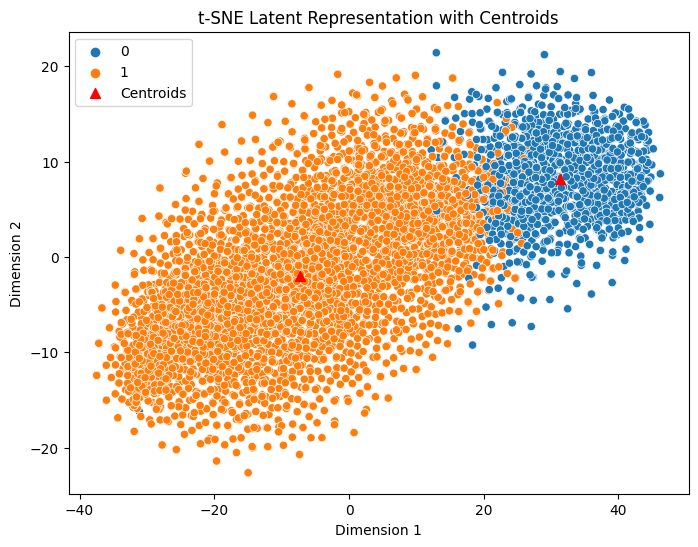

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np

def plot_vector_distribution(vector_representation, kmeans_labels):
    tsne = TSNE(random_state=0)
    tsne_result = tsne.fit_transform(vector_representation)

    df_tsne = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
    df_tsne['Cluster Label'] = kmeans_labels

    cluster_palette = sns.color_palette('tab10', n_colors=len(np.unique(kmeans_labels)))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster Label', data=df_tsne, palette=cluster_palette)
    
    # Menambahkan centroid ke dalam plot
    centroids = []
    for label in np.unique(kmeans_labels):
        centroid = np.mean(tsne_result[kmeans_labels == label], axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=50, label='Centroids')
    
    plt.title('t-SNE Latent Representation with Centroids')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

plot_vector_distribution(embeddings, kmeans.labels_)

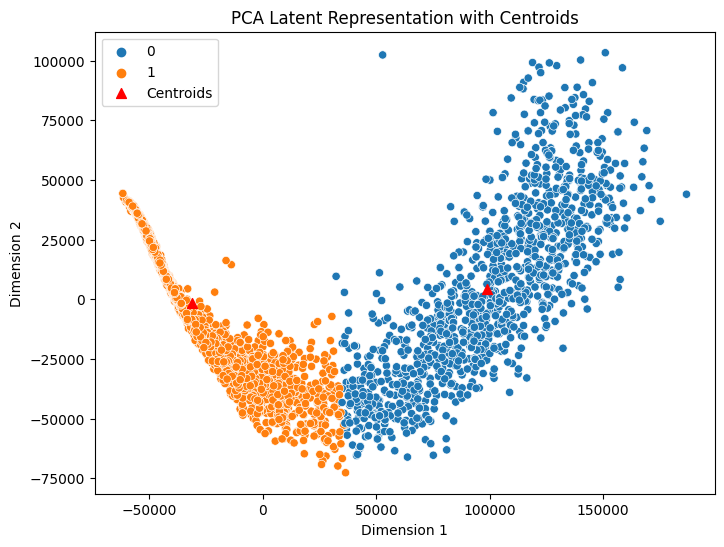

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

def plot_vector_distribution(vector_representation, kmeans_labels):
    pca = PCA(n_components=2, random_state=0)
    pca_result = pca.fit_transform(vector_representation)

    df_pca = pd.DataFrame(pca_result, columns=['Dimension 1', 'Dimension 2'])
    df_pca['Cluster Label'] = kmeans_labels

    cluster_palette = sns.color_palette('tab10', n_colors=len(np.unique(kmeans_labels)))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster Label', data=df_pca, palette=cluster_palette)
    
    # Menambahkan centroid ke dalam plot
    centroids = []
    for label in np.unique(kmeans_labels):
        centroid = np.mean(pca_result[kmeans_labels == label], axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=50, label='Centroids')
    
    plt.title('PCA Latent Representation with Centroids')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

plot_vector_distribution(embeddings, cluster_labels)
